In [75]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import sqlite3
import csv

In [76]:
df=pd.read_csv('/content/FinancialAnalyticsdata.csv')

In [77]:
#print(df.info)
#converting the csv file to .db file and storing the data in sales.db
conn = sqlite3.connect('finance_db.db')
df.to_sql('finance_data',conn,if_exists='replace',index=False)

488

In [78]:
df.shape

(488, 5)

In [79]:
df.size

2440

In [80]:
df.columns

Index(['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unknown'], dtype='object')

In [81]:
#df.describe()

In [82]:
df.ndim

2

In [83]:
df.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,9
Sales Qtr - Crore,123
Unknown,394


In [84]:
df.dropna()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unknown


In [85]:
#df.describe()

In [86]:
count_unique=df['Name'].value_counts()
print(count_unique)

Name
Reliance Inds.      1
Dishman Carbogen    1
Timken India        1
GE Power            1
Guj Alkalies        1
                   ..
Tata Global         1
Reliance Nip.Lif    1
Apollo Hospitals    1
MphasiS             1
L T Foods           1
Name: count, Length: 488, dtype: int64


In [87]:
df.duplicated()
df.drop_duplicates()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unknown
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [88]:
#df.groupby('Name')['Mar Cap - Crore'].sum().plot(kind='barh')
#plt.ylabel('Company')
#plt.xlabel('MarCap (in Crores)')
#plt.show()


In [89]:
#df.groupby('Name')['Sales Qtr - Crore'].sum().plot(kind='barh')
#plt.title('Sales by Company(before Imputation)')
#plt.xlabel('Company')
#plt.ylabel('Sales (in Crores)')
#plt.show()


In [90]:
#df.groupby('Name')['Unknown'].sum().plot(kind='barh')
#plt.title('Sales by Company(before Imputation)')
#plt.xlabel('Name')
#plt.ylabel('Unknown Values')
#plt.show()


In [91]:
df['Mar Cap - Crore'].fillna(df['Mar Cap - Crore'].mean(), inplace=True)  #Imputation to fill the null values with mean values

In [92]:
#df.groupby('Name')['Mar Cap - Crore'].sum().plot(kind='barh')
#plt.title('Market capitalization by Company(After Imputation)')
#plt.ylabel('Company')
#plt.xlabel('MarCap (in Crores)')
#plt.show()

In [93]:
df['Sales Qtr - Crore'].fillna(df['Sales Qtr - Crore'].mean(), inplace=True)  #Imputation to fill the null values with mean values

In [94]:
#df.groupby('Name')['Sales Qtr - Crore'].sum().plot(kind='barh')
#plt.title('Sales by Company(after Imputation)')
#plt.ylabel('Company')
#plt.xlabel('Sales (in Crores)')
#plt.show()

In [95]:
df['Unknown'].fillna(df['Unknown'].mean(), inplace=True) #Imputation to fill the null values with mean values

In [96]:
#df.groupby('Name')['Unknown'].sum().plot(kind='barh')
#plt.title('Unknown(after Imputation)')
#plt.ylabel('Company')
#plt.xlabel('Unknown')
#plt.show()

In [97]:
# Group by Company and calculate sum of market capitalization and quarterly sales
Company_stats = df.groupby('Name')[['Mar Cap - Crore', 'Sales Qtr - Crore']].sum().reset_index()

# Sort by market capitalization in descending order
Company_stats = Company_stats.sort_values('Mar Cap - Crore', ascending=False)

# Select top 100 Companies
top_10_Companies = Company_stats.head(10)

# Print the results
print(top_10_Companies)


               Name  Mar Cap - Crore  Sales Qtr - Crore
371  Reliance Inds.        583436.72           99810.00
429             TCS        563709.84           30904.00
182       HDFC Bank        482953.59           20581.27
216             ITC        320985.27            9772.02
177         H D F C        289497.37           16840.51
195  Hind. Unilever        288265.26            8590.00
296   Maruti Suzuki        263493.81           19283.20
231         Infosys        248320.35           17794.00
325         O N G C        239981.50           22995.88
409  St Bk of India        232763.33           57014.08


<Figure size 1600x6000 with 0 Axes>

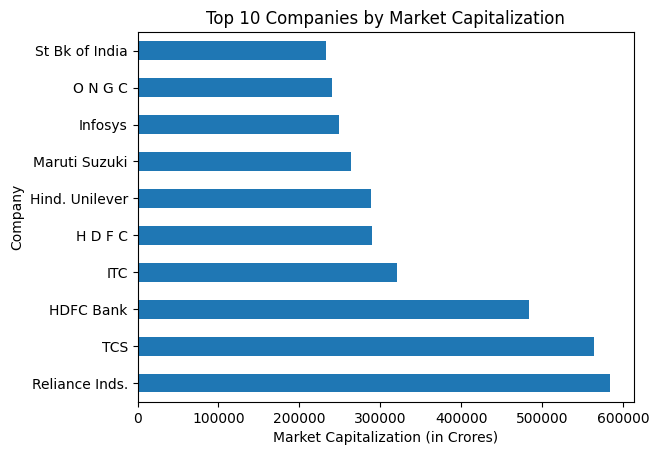

In [98]:
plt.figure(figsize=(16, 60))  # Adjust the figure size if needed
top_10_Companies.plot(kind='barh', x='Name', y='Mar Cap - Crore', legend=False)

# Adding title and labels
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Capitalization (in Crores)')
plt.ylabel('Company')

# Show the plot
plt.show()


<Figure size 1600x6000 with 0 Axes>

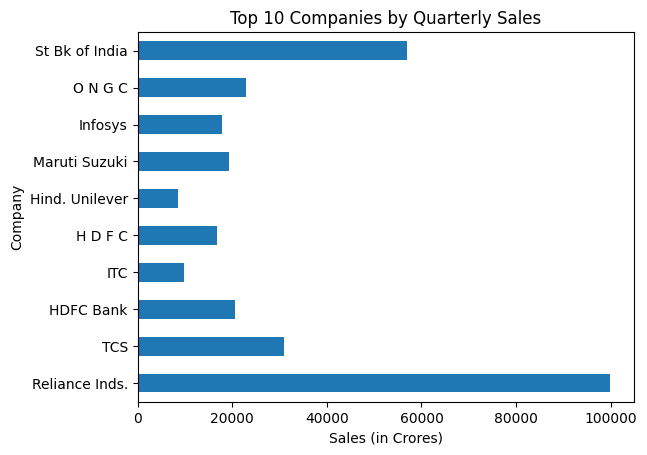

In [99]:
plt.figure(figsize=(16, 60))  # Adjust the figure size if needed
top_10_Companies.plot(kind='barh', x='Name', y='Sales Qtr - Crore', legend=False)

# Adding title and labels
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Sales (in Crores)')
plt.ylabel('Company')

# Show the plot
plt.show()

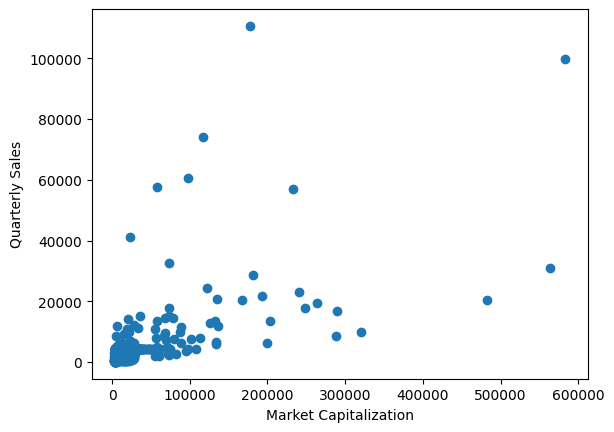

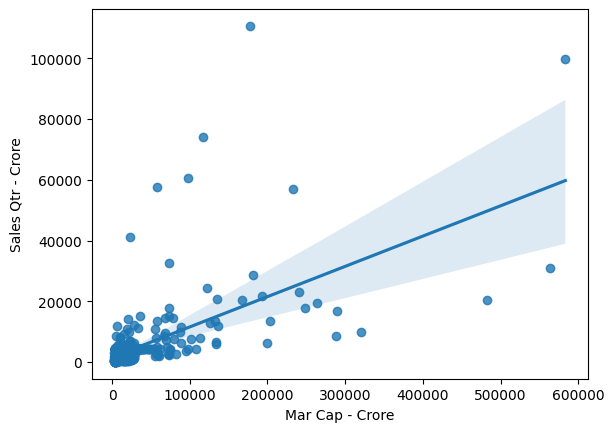

Threshold value (Mar Cap - Crore): 380669.91648277186


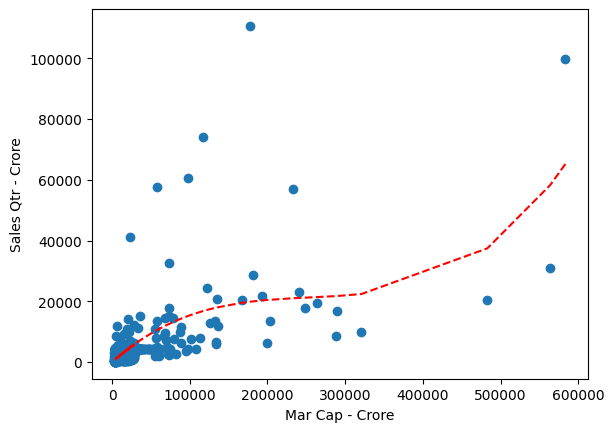

In [100]:
#scatter plot  of market capitalization vs. quarterly sales to visualize the relationship.
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'])
plt.xlabel('Market Capitalization')
plt.ylabel('Quarterly Sales')
plt.show()
##### scatter plot using seaborn
sns.regplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df)
plt.show()
##### scatter plot using numpy
plt.scatter(df['Mar Cap - Crore'], df['Sales Qtr - Crore'])

# Calculate regression line
z = np.polyfit(df['Mar Cap - Crore'], df['Sales Qtr - Crore'], 3)
p = np.poly1d(z)

# Plot regression line
plt.plot(df['Mar Cap - Crore'], p(df['Mar Cap - Crore']), "r--")

# Find point of inflection (threshold value)
threshold = -z[1] / (2 * z[0])
print("Threshold value (Mar Cap - Crore):", threshold)

plt.xlabel('Mar Cap - Crore')
plt.ylabel('Sales Qtr - Crore')
plt.show()


In [101]:
# Calculating the correlation coefficient (e.g., Pearson's r) between market capitalization and quarterly sales to quantify the strength of the relationship.
corr_coef = np.corrcoef(df['Mar Cap - Crore'], df['Sales Qtr - Crore'])[0, 1]
print(f'Correlation coefficient: {corr_coef:.2f}')



Correlation coefficient: 0.61


In [102]:
#  Performing a linear regression analysis to model the relationship between market capitalization and quarterly sales. This will help you identify if there's a significant relationship and if there's a threshold effect.
X = df['Mar Cap - Crore'].values.reshape(-1, 1)
y = df['Sales Qtr - Crore'].values
model = LinearRegression().fit(X, y)
print(f'Coefficient of determination (R^2): {model.score(X, y):.2f}')

Coefficient of determination (R^2): 0.37


Best depth: 3


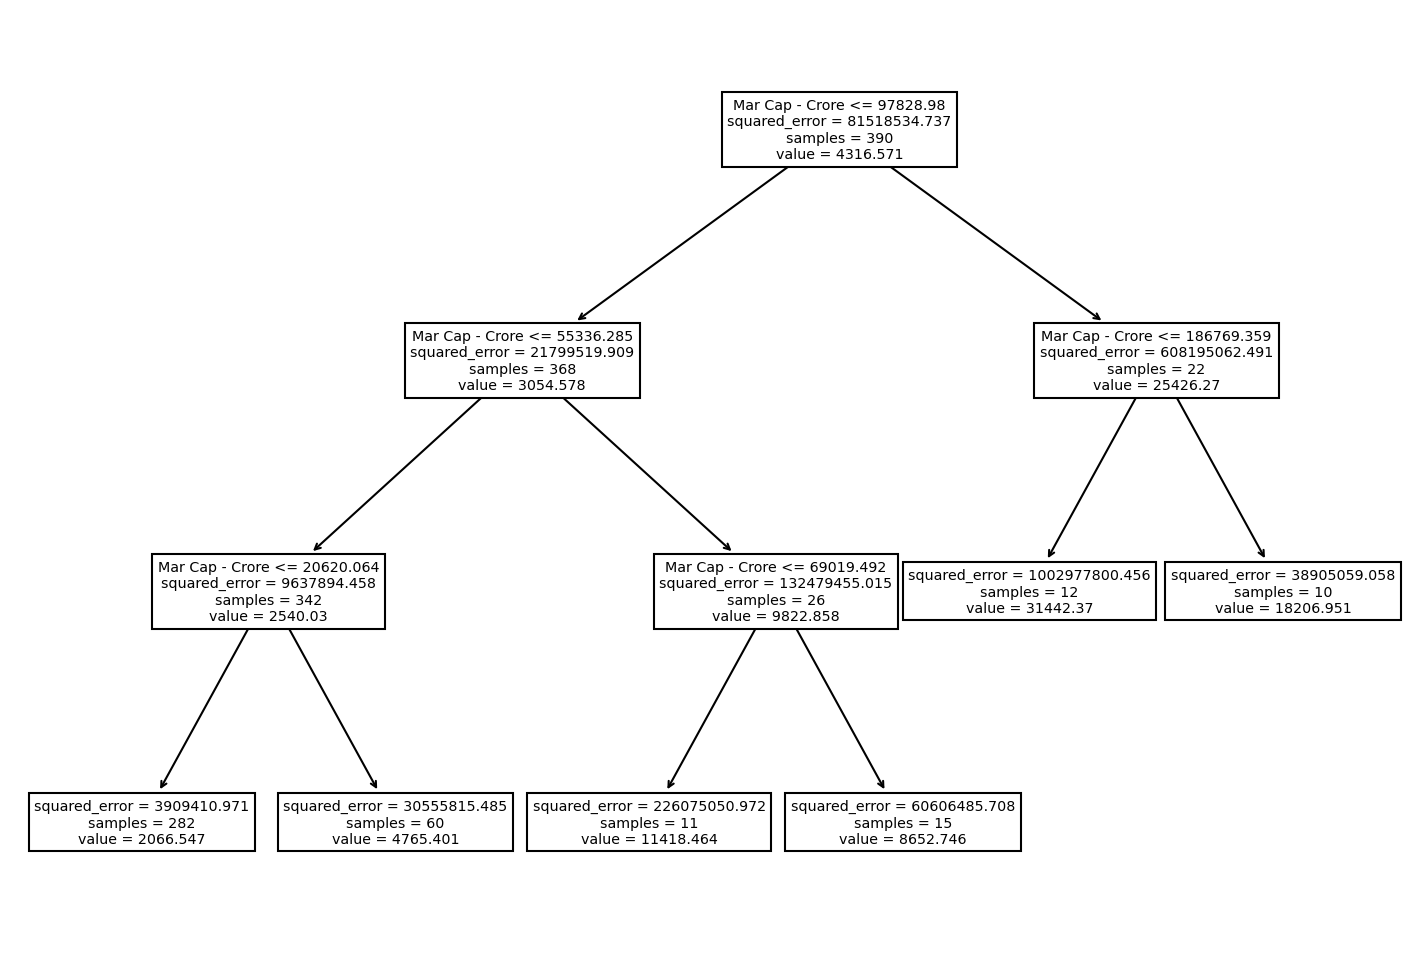

In [103]:
#Making a decision tree to identify potential thresholds in market capitalization beyond which quarterly sales increase significantly.
# Split data into training and testing sets and build a train test model
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
#deciding the best depth for tree
param_grid = {'max_depth': [3, 5, 8, 12]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(df[['Mar Cap - Crore']], df['Sales Qtr - Crore'])

print("Best depth:", grid_search.best_params_['max_depth'])


# Train decision tree model
dt_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'], min_samples_leaf=10)
dt_model.fit(train_data[['Mar Cap - Crore']], train_data['Sales Qtr - Crore'])

# Plot decision tree
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(dt_model, feature_names=['Mar Cap - Crore'], class_names=['Sales Qtr - Crore'])
plt.show()